# 생물정보학 및 실습 1 - Term Project용 환경 셋업

```
생물정보학 및 실습 1
서울대학교 생물정보학전공/생명과학부 2025년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Disconnect and delete runtime`을 누르고 새로 시작하시면 될 수도 있습니다.

Colab 상에서 파일 경로나 디렉토리를 더 쉽게 보고 싶은 분들은, 화면 왼쪽의 아이콘들 중 가장 아래 폴더 아이콘을 눌러서 볼 수 있습니다.

`Runtime->Run All`으로 실행했을 때, `wget`이나 `rsync` 명령이 연결이 잘 안 되어 중간에 에러가 일부 날 수 있지만 해당 셀만 다시 실행하면 해결되는 경우도 있습니다. 해당되는 셀에는 셀의 앞이나 뒤에 추가 설명을 작성하였으니 참고해 주세요.

## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

fatal: destination path 'colab-biolab' already exists and is not an empty directory.
./
./root/
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.tmux.conf
./root/.bashrc.biolab
./root/.condarc
./root/.profile
PREFIX=/root/conda
Unpacking payload ...
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
entry_point.py:256: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to contr

Google CoLab에서 shell command를 실행할 때는 명령 앞에 !을 붙이면 실행할 수 있습니다.

## 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh?usp=sharing)에 접속합니다.
1. 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Organize -> Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [3]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7162852
-r-------- 1 root root 1370036258 Apr 27  2023 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27  2023 CLIP-35L33G.bam.bai
-r-------- 1 root root       7113 May 11  2023 CLIP-let7g.bam
-r-------- 1 root root      14561 May 11  2023 CLIP-let7g-gene.pileup
-r-------- 1 root root    2685065 May 11  2023 CLIP-let7g.pileup
-r-------- 1 root root  883334756 Apr 27  2023 gencode.gtf
-r-------- 1 root root   24065406 Apr 27  2023 read-counts.txt
-r-------- 1 root root        751 Apr 27  2023 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27  2023 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27  2023 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27  2023 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27  2023 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27  2023 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27  2023 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27  2023 RPF-siLin28a.bam
-r-------- 1 r

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다.

첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [4]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

--2025-05-08 01:11:17--  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Resolving hyeshik.qbio.io (hyeshik.qbio.io)... 147.47.203.129
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
Unable to establish SSL connection.
tar: This does not look like a tar archive
tar: Exiting with failure status due to previous errors


그리고, GENCODE Annotation 데이터도 미리 받아서 저장해 둡니다. 에러가 나면 다시 한 번 실행해 봅니다.

In [5]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

/content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz: Read-only file system


### 파일 체크섬 확인

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요. (나중에 자동으로 비교하고 싶으시면 `md5sum -c` 옵션을 사용하면 됩니다. 여기서는 MD5를 처음 써 보는 의미에서 직접 비교해 봅시다.)

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [6]:
!md5sum /content/drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  /content/drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  /content/drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
5d0265965487c33475f48869fc9df2d2  /content/drive/MyDrive/binfo1-datapack1/CLIP-let7g.bam
4ea14471c5d4bf9ab1fd91b9a5b2193c  /content/drive/MyDrive/binfo1-datapack1/CLIP-let7g-gene.pileup
a53f66a5575d4ac2d3b4c44af576d44d  /content/drive/MyDrive/binfo1-datapack1/CLIP-let7g.pileup
d54d428f5872030c4ffc43058709b896  /content/drive/MyDrive/binfo1-datapack1/gencode.gtf
2698e6c8e30005ebc0593d3b9e9b5c58  /content/drive/MyDrive/binfo1-datapack1/read-counts.txt
7c9528c08ed2f1ae6e2de599db1aa8fb  /content/drive/MyDrive/binfo1-datapack1/read-counts.txt.summary
328883a73d507eafbf5b60bd6b906201  /content/drive/MyDrive/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  /content/drive/MyDrive/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  /content/drive/MyDrive/binfo1-datapack1/RNA-si

In [7]:
!ls -al /content/drive/MyDrive/binfo*

lrw------- 1 root root    0 May  8 01:08 /content/drive/MyDrive/binfo1-datapack1 -> /content/drive/.shortcut-targets-by-id/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh/binfo1-datapack1

/content/drive/MyDrive/binfo1-work:
total 0


실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [8]:
!conda install -y subread

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: / - done

## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - subread


The following packages will be UPDATED:

  ca-certificates    pkgs/main/linux-64::ca-certificates-2~ --> conda-forge/noarch::ca-certificates-2025.4.26-hbd8a1cb_0 
  conda              pkgs/main::conda-25.3.1-py313h06a4308~ --> conda-forge::conda-25.3.1-py313h78bf25f_1 




Preparing transaction: | done
Verifying transaction: - done
Executing transaction: | done


## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다.

먼저 작업 디렉토리를 만들고 데이터를 원본 디렉토리에서 복사해 옵니다. (이미 이 노트북을 실행한 적이 있으면 다시 할 필요는 없습니다.)

In [9]:
!cd /content/drive/MyDrive; mkdir cctest; touch cctest/.test; ls -al cctest/

total 0
-rw------- 1 root root 0 May  8 01:15 .test


In [10]:
!rsync -h

rsync  version 3.2.7  protocol version 31
Copyright (C) 1996-2022 by Andrew Tridgell, Wayne Davison, and others.
Web site: https://rsync.samba.org/
Capabilities:
    64-bit files, 64-bit inums, 64-bit timestamps, 64-bit long ints,
    socketpairs, symlinks, symtimes, hardlinks, hardlink-specials,
    hardlink-symlinks, IPv6, atimes, batchfiles, inplace, append, ACLs,
    xattrs, optional secluded-args, iconv, prealloc, stop-at, no crtimes
Optimizations:
    SIMD-roll, no asm-roll, openssl-crypto, no asm-MD5
Checksum list:
    xxh128 xxh3 xxh64 (xxhash) md5 md4 sha1 none
Compress list:
    zstd lz4 zlibx zlib none
Daemon auth list:
    sha512 sha256 sha1 md5 md4

rsync comes with ABSOLUTELY NO WARRANTY.  This is free software, and you
are welcome to redistribute it under certain conditions.  See the GNU
General Public Licence for details.

rsync is a file transfer program capable of efficient remote update
via a fast differencing algorithm.

Usage: rsync [OPTION]... SRC [SRC]... DEST
  

Colab에서 실습하시는 경우 Google Drive 환경에 따라서 간혹 `rsync`에서 에러가 날 수 있습니다. (주석 처리해 두었습니다.)

 그럴 때는 `rsync`대신 `cp` 명령으로 `binfo1-datapack1`에 있는 파일들을 모두 `binfo1-work`로 옮겨서 작업하시면 됩니다. `cp` 명령도 에러가 난다면, 구글 드라이브 GUI를 이용해서 복사해도 괜찮습니다. Colab에서는 파일들을 `binfo1-work`로 꼭 옮겨 주세요. Colab 외에서 실습하시는 분들은 편한 방법대로 하시면 됩니다.

In [11]:
!mkdir -p /content/drive/MyDrive/binfo1-work
# !rsync -Pav /content/drive/MyDrive/binfo1-datapack1/ /content/drive/MyDrive/binfo1-work/

In [12]:
%cd /content/drive/MyDrive/binfo1-work

/content/drive/MyDrive/binfo1-work


In [13]:
%cp -r /content/drive/MyDrive/binfo1-datapack1/* /content/drive/MyDrive/binfo1-work/

자! bam 파일에 담긴 aligned reads와 gtf 파일에 담긴 gene annotation으로 gene별 read count를 구합니다.

In [14]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.1

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 7 BAM files                                      ||
||                           o CLIP-35L33G.bam                                ||
||                           o CLIP-let7g.bam                                 ||
||                           o RNA-control.bam                                ||
||                           o RNA-siLin28a.bam                  

결과를 pandas로 읽어와 봅니다.

In [52]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0


이제 한 번 대충 그림을 그려 봅니다.

In [53]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


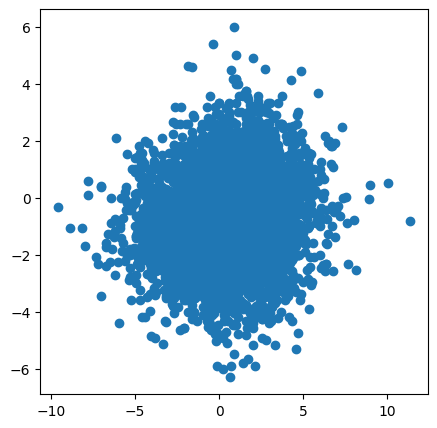

In [46]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

이 그림에는 문제가 많이 있습니다. 논문의 그림 Figure 4D처럼 한 번 만들어 봅시다~

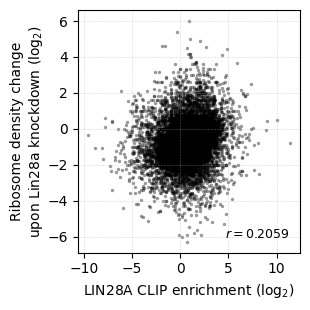

In [47]:
# 여기에 코드를 새로 작성해서 논문의 그림과 비슷하게 만들어 봅니다.
import numpy as np
import matplotlib.pyplot as plt

# 데이터 준비
x = np.log2(cnts['clip_enrichment'])
y = np.log2(cnts['rden_change'])

mask = np.isfinite(x) & np.isfinite(y)
x, y = x[mask], y[mask]

# 산점도 그리기
fig, ax = plt.subplots(figsize=(3.2, 3.2))

ax.scatter(
    x, y,
    s=6,
    alpha=0.40,
    linewidth=0,
    color = 'black'
)


ax.set_xlabel('LIN28A CLIP enrichment (log$_2$)')
ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log$_2$)', labelpad=2)

ax.grid(True, which='major', linestyle='--', linewidth=0.4, alpha=0.5)


r = np.corrcoef(x, y)[0, 1]
ax.text(
    0.95, 0.05,
    rf'$r = {r:.4f}$',
    transform=ax.transAxes,
    ha='right', va='bottom',
    fontsize=9
)


plt.tight_layout()
plt.show()


## Protein localization 반영하기

논문 그림(Figure 5B, S6A)에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [49]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [54]:
cnts = cnts.reset_index()
cnts.rename(columns={cnts.columns[0]: 'gene_id'}, inplace=True)
cnts['gene_id'] = cnts['gene_id'].astype(str)
cnts['gene_id'] = cnts['gene_id'].str.replace(r'\.\d+$', '', regex=True)
cnts.head()

,gene_id,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,CLIP-let7g.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
0,ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,0,NaN,NaN
1,ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0,0,NaN,NaN
2,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,0,1,1,1,0,0,4.0,NaN
3,ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0,0,inf,NaN
4,ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,0,NaN,NaN


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


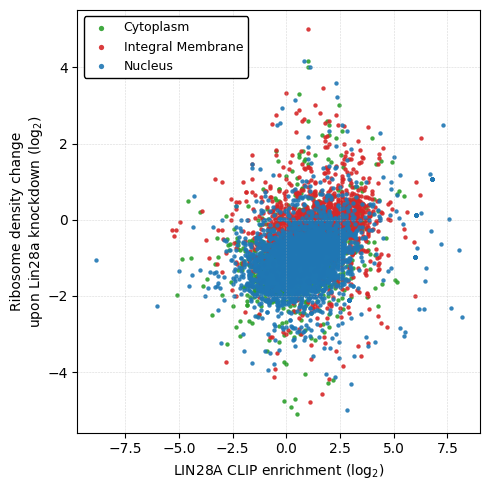

In [59]:
# 여기에 새로 코드를 작성해서 논문 그림과 비슷하게 만들어 봅시다.

# 관심 있는 3개 localization만 남기고, 이름을 소문자로 정리
loc_keep = {'nucleus', 'integral membrane', 'cytoplasm'}
mouselocal = (
    mouselocal
      .assign(type=lambda d: d['type'].str.lower())   # 'Nucleus' → 'nucleus'
      .query('type in @loc_keep')
      .loc[:, ['gene_id', 'type']]
)

# ─────────────────────────────────────────────────────────────
# 2.  cnts 와 병합 → localization 정보가 있는 유전자만 추출
# ─────────────────────────────────────────────────────────────
annot = cnts.merge(mouselocal, on='gene_id', how='inner')  # how='left' 로 하면 NaN 도 남음

# ─────────────────────────────────────────────────────────────
# 3.  산점도 그리기 (색상 매핑 포함)
# ─────────────────────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt

# 색상 팔레트 (논문과 비슷한 계열)
color_map = {
    'nucleus'          : '#1f77b4',  # blue
    'integral membrane': '#d62728',  # red
    'cytoplasm'        : '#2ca02c'   # green
}

fig, ax = plt.subplots(figsize=(5, 5))

for loc, group in annot.groupby('type'):
    x = np.log2(group['clip_enrichment'])
    y = np.log2(group['rden_change'])
    mask = np.isfinite(x) & np.isfinite(y)
    ax.scatter(
        x[mask], y[mask],
        s=10,
        alpha=0.9,        # 원본 그림은 불투명
        linewidth=0,
        color=color_map[loc],
        label=loc.title() # 범례에 대문자 첫 글자
    )

# ─────────────────────────────────────────────────────────────
# 4.  축, 격자, 레이블, 범례, 패널 문자/제목
# ─────────────────────────────────────────────────────────────

ax.set_xlabel('LIN28A CLIP enrichment (log$_2$)')
ax.set_ylabel('Ribosome density change\nupon Lin28a knockdown (log$_2$)', labelpad=2)

ax.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)

# 깔끔한 범례 상자 (검은 테두리·흰 배경)
leg = ax.legend(
    loc='upper left',
    frameon=True,
    framealpha=1,
    edgecolor='black',
    fontsize=9,
    markerscale=1.2
)



plt.tight_layout()
plt.show()
